# HY3: Policy Impact (Post-2015)

**Hypothesis:** Air quality improved after 2015 in developed countries


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [12]:
# Load data
df = pd.read_csv('../cleaned_data/analysis_ready.csv')
df = df[df['income_category'] == 'High Income'][['year', 'mean_value_PM25']].dropna()

# Split pre/post 2015
pre = df[df['year'] < 2015]['mean_value_PM25']
post = df[df['year'] >= 2015]['mean_value_PM25']

print(f"Pre-2015: {pre.mean():.2f} µg/m³")
print(f"Post-2015: {post.mean():.2f} µg/m³")
print(f"Change: {((post.mean()-pre.mean())/pre.mean()*100):+.2f}%")

Pre-2015: 12.70 µg/m³
Post-2015: 13.26 µg/m³
Change: +4.44%


In [13]:
# Statistical test
t_stat, p_val = stats.ttest_ind(pre, post)
print(f"\nt-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05 and post.mean() < pre.mean():
    print("\n✓ Hypothesis SUPPORTED: Significant improvement after 2015")
else:
    print("\n✗ Hypothesis NOT supported")


t-statistic: -0.369
p-value: 0.7127

✗ Hypothesis NOT supported


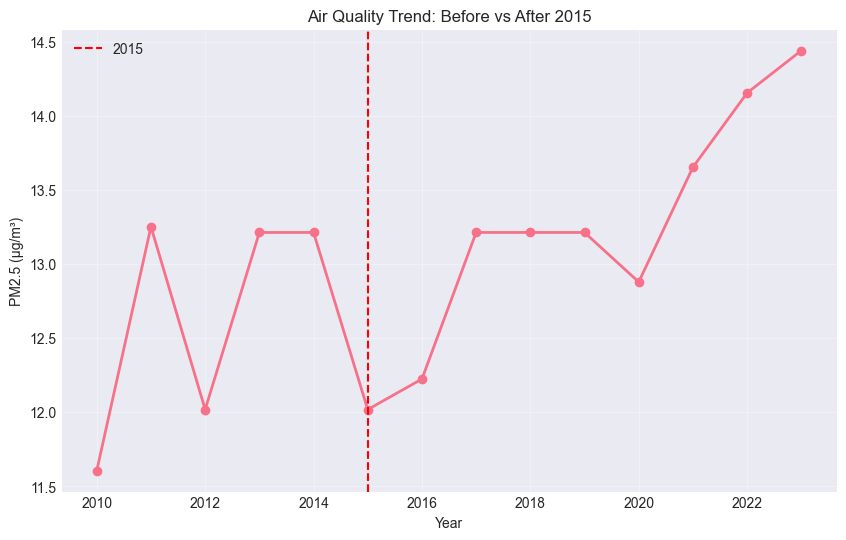

In [15]:
# Visualization
yearly = df.groupby('year')['mean_value_PM25'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly.index, yearly.values, 'o-', linewidth=2)
plt.axvline(x=2015, color='red', linestyle='--', label='2015')
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Air Quality Trend: Before vs After 2015')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/HY3_trend.png', dpi=300, bbox_inches='tight')
plt.show()